# Transformando 3D para 2D

Nesse código está sendo utilizado o código de transformação de caixas 3D para 2D disponível em `get_2D_boxes_from_sample_data.py`.

O intuíto deste notebook é apenas ver como utilizar essa função e ver o seu resultado.

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from nuscenes.nuscenes import NuScenes

import os

In [2]:
data_path = '../../data'  # Caminho até o diretório onde os dados da nuscenes estão
nusc = NuScenes(version='v1.0-mini', dataroot=data_path, verbose=True)  # Carrega o dataset

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.763 seconds.
Reverse indexing ...
Done reverse indexing in 0.2 seconds.


In [3]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(img):
    plt.figure(figsize=(20, 20))
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.show()

In [4]:
def load_nuscenes_image(sample_num):
    '''
    Carrega a imagem da câmera frontal do sample `sample_num`
    '''
    sample_data = nusc.get('sample_data', nusc.sample[sample_num]['data']['CAM_FRONT'])
    image_path = os.path.join(data_path, sample_data['filename'])
    image = read_image(image_path)
    return sample_data, image

In [5]:
from get_2D_boxes_from_sample_data import get_2D_boxes_from_sample_data

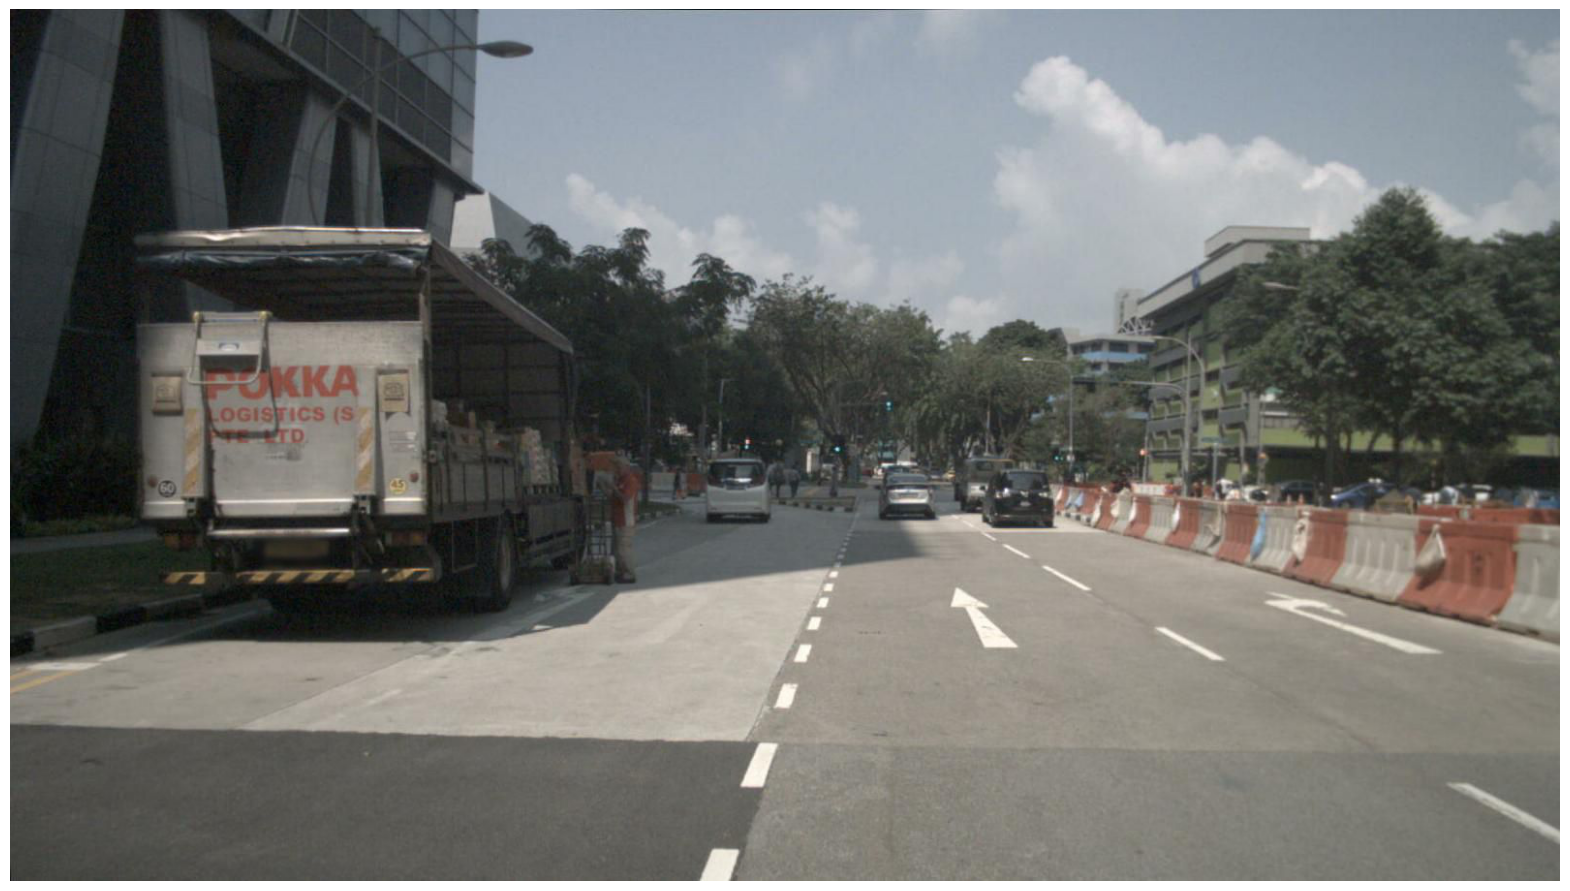

In [6]:
sample_data, image_1 = load_nuscenes_image(0)
show(image_1)

In [7]:
boxes, classes = get_2D_boxes_from_sample_data(nusc, sample_data['token'])

print(type(boxes))
print(boxes)

print(type(classes))
print(classes)

<class 'list'>
[(1206.5693751819115, 477.86111828160216, 1225.8893058022243, 513.6450176828284), (1547.0702570814112, 480.157008968664, 1592.2386978948543, 542.5484666382708), (1504.5998756594938, 489.2410313615559, 1621.603118466258, 523.6438115684756), (1189.5640200302091, 479.5160042514046, 1232.1589912719896, 516.4196073203952), (1487.3940336599594, 478.23851454257533, 1523.25701561576, 540.9936348707839), (680.7310301660298, 472.6859292687877, 699.2671419928738, 507.777136168809), (1188.1100058411344, 501.17188965399157, 1250.3922655382125, 564.6771567754517), (1165.1675845207922, 499.38661351787505, 1223.329143345562, 556.9541635699262), (1002.677828993682, 473.88690882935975, 1082.9731473228485, 538.9038595447208), (1214.3796207477296, 480.5290927589441, 1236.6691084407832, 517.1920047245397), (62.56267031778199, 203.35161824878537, 622.2970998319081, 679.0877574086862), (641.5946867960146, 457.6699866604573, 728.5716712385176, 495.55478131682816), (765.8348507722964, 461.948846

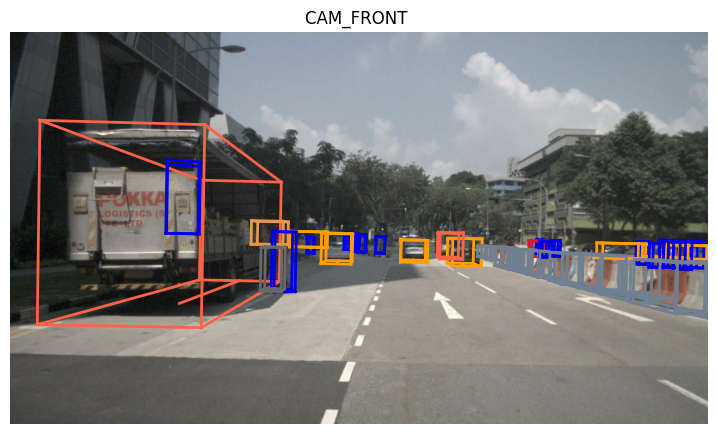

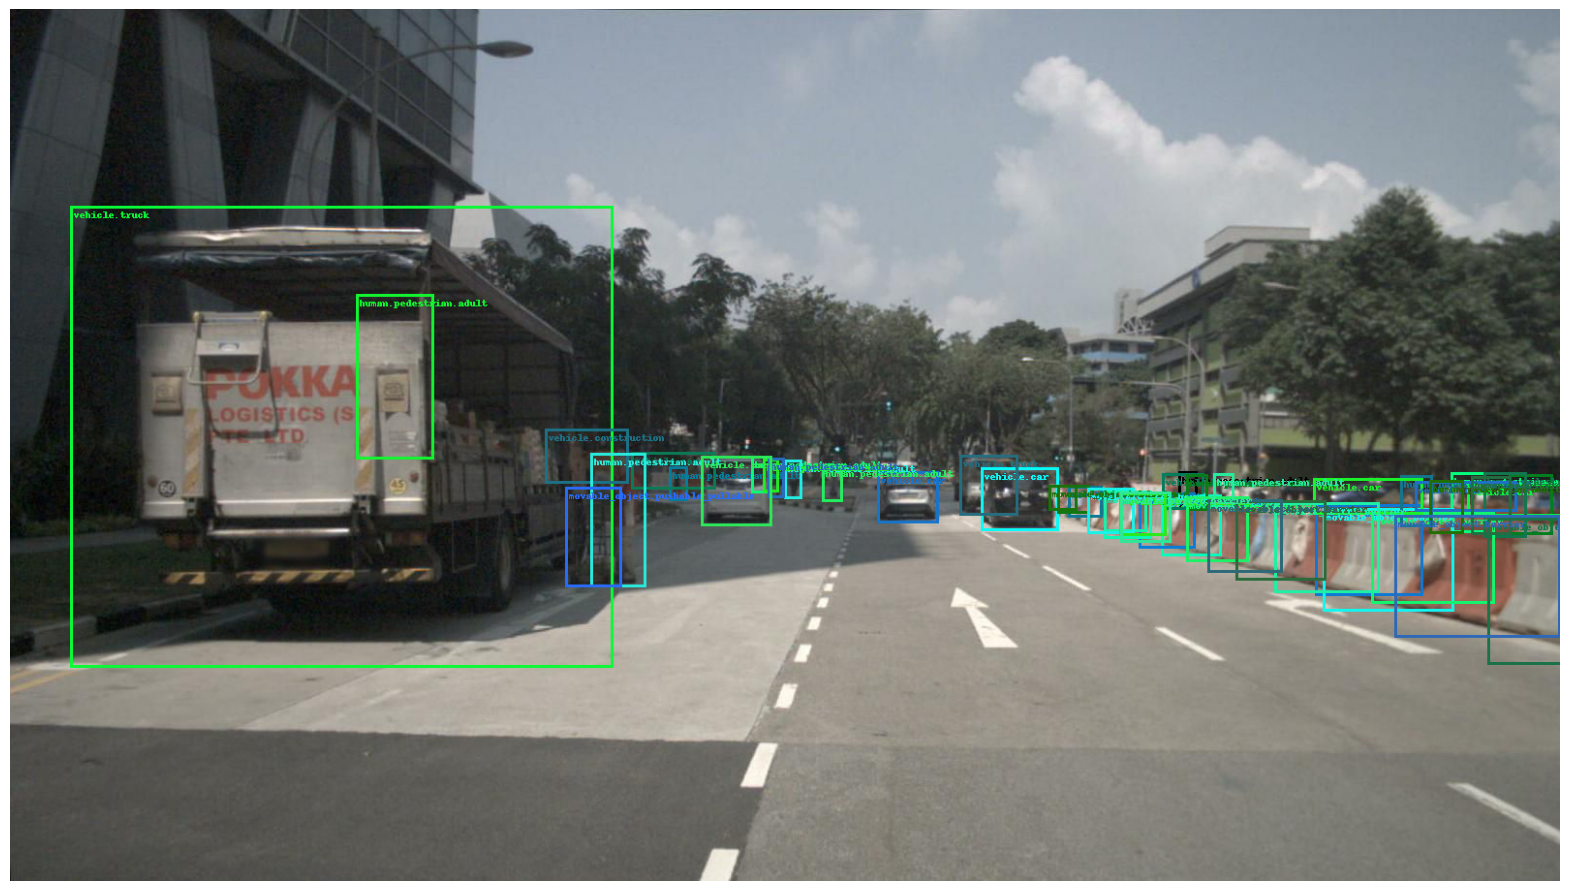

In [8]:
nusc.render_sample_data(sample_data['token'])
show(draw_bounding_boxes(image_1, torch.tensor(boxes), labels=classes, width=3))